In [33]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.express as px

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

import datetime

%matplotlib inline

In [4]:
df = pd.read_csv('CLAIM.csv', index_col='ID')
df.head()

,CHILD_DRIV,AGE,CHILDREN,YOJ,INCOME,HOUSE_VAL,STATUS,GENDER,EDU_LEVEL,JOB,DISTANCE,CAR_USE,VEHICLE_VAL,VEHICLE_TYPE,CLM_FREQ,REVOKED,MVR_PTS,CLAIM_AMOUNT,VEHICLE_AGE,CLAIM_IND,AREA,STATE_CODE
ID,,,,,,,,,,,,,,,,,,,,,,
6.921625e+09,0,67.0,0,14.0,"$53,841","$359,229",z_No,Mal,Bachelors,None,71,Private,"$21,970",Family,0,No,2,$294,12.0,0,Highly Urban/ Urban,Berlin
1.227899e+09,0,26.0,1,13.0,"$16,999","$265,527",NaN,Fem,z_High School,Clerical,50,Private,"$4,010",unknown,4,No,7,$292,12.0,0,Highly Urban/ Urban,Thueringen
1.950524e+09,0,71.0,0,17.0,NaN,"$323,918",Yes,Mal,<High School,Teacher,77,Private,"$15,440",Minivan,0,No,0,$387,8.0,0,Highly Urban/ Urban,Bayern
1.743448e+09,0,68.0,0,NaN,"$115,546","$361,705",Yes,Fem,PhD,Doctor,81,Private,"$18,000",unknown,4,Yes,3,$308,19.0,0,Highly Urban/ Urban,Bayern
7.371333e+09,0,32.0,1,15.0,"$125,861","$70,668",z_No,Fem,Bachelors,Teacher,91,Commercial,"$17,430",Sports Car,0,No,0,"$3,221",9.0,1,Highly Urban/ Urban,Bayern


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10300 entries, 6921625014.0 to 1680683365.0
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CHILD_DRIV    10300 non-null  int64  
 1   AGE           10293 non-null  float64
 2   CHILDREN      10300 non-null  int64  
 3   YOJ           9752 non-null   float64
 4   INCOME        9730 non-null   object 
 5   HOUSE_VAL     9725 non-null   object 
 6   STATUS        10298 non-null  object 
 7   GENDER        10300 non-null  object 
 8   EDU_LEVEL     10300 non-null  object 
 9   JOB           9635 non-null   object 
 10  DISTANCE      10300 non-null  int64  
 11  CAR_USE       10300 non-null  object 
 12  VEHICLE_VAL   10300 non-null  object 
 13  VEHICLE_TYPE  10300 non-null  object 
 14  CLM_FREQ      10300 non-null  int64  
 15  REVOKED       10300 non-null  object 
 16  MVR_PTS       10300 non-null  int64  
 17  CLAIM_AMOUNT  10300 non-null  object 
 18  VEHICL

In [105]:
mon = '$359,229'

In [106]:
mon.replace(",", "")[1:]

'359229'

In [112]:
df.HOUSE_VAL

ID
6.921625e+09    $359,229
1.227899e+09    $265,527
1.950524e+09    $323,918
1.743448e+09    $361,705
7.371333e+09     $70,668
                  ...   
8.068101e+09    $456,941
6.562279e+09    $738,932
3.349511e+09    $335,503
2.128130e+09    $473,143
1.680683e+09    $255,907
Name: HOUSE_VAL, Length: 10020, dtype: object

In [153]:
money_cols = ['HOUSE_VAL', 'VEHICLE_VAL', 'CLAIM_AMOUNT', 'INCOME']

In [124]:

df['CLAIM_AMOUNT'] = df['CLAIM_AMOUNT'].apply(lambda x: x.replace(",", "")[1:])


In [126]:
df['VEHICLE_VAL'] = df['VEHICLE_VAL'].apply(lambda x: x.replace(",", "")[1:])

In [138]:
df['HOUSE_VAL'] = df['HOUSE_VAL'].apply(lambda x: str(x).replace(",", "")[1:])

In [147]:
df['INCOME'] = df['INCOME'].apply(lambda x: str(x).replace(",", "")[1:])

In [152]:
df = df[~(df.INCOME=='an')]

In [155]:
df = df[~(df.HOUSE_VAL=='an')]

In [156]:
df[money_cols]

,HOUSE_VAL,VEHICLE_VAL,CLAIM_AMOUNT,INCOME
ID,,,,
6.921625e+09,359229,1970,294,53841
1.227899e+09,265527,010,292,16999
1.743448e+09,361705,8000,308,115546
7.371333e+09,70668,7430,3221,125861
7.008255e+09,530010,8930,6658,51375
...,...,...,...,...
8.068101e+09,456941,3270,294,165629
6.562279e+09,738932,4490,261,108164
3.349511e+09,335503,3820,411,40397


In [121]:
df['HOUSE_VAL'].astype(str)

ID
6.921625e+09    $359,229
1.227899e+09    $265,527
1.950524e+09    $323,918
1.743448e+09    $361,705
7.371333e+09     $70,668
                  ...   
8.068101e+09    $456,941
6.562279e+09    $738,932
3.349511e+09    $335,503
2.128130e+09    $473,143
1.680683e+09    $255,907
Name: HOUSE_VAL, Length: 10020, dtype: object

In [8]:
df.dropna()

,CHILD_DRIV,AGE,CHILDREN,YOJ,INCOME,HOUSE_VAL,STATUS,GENDER,EDU_LEVEL,JOB,DISTANCE,CAR_USE,VEHICLE_VAL,VEHICLE_TYPE,CLM_FREQ,REVOKED,MVR_PTS,CLAIM_AMOUNT,VEHICLE_AGE,CLAIM_IND,AREA,STATE_CODE
ID,,,,,,,,,,,,,,,,,,,,,,
6.921625e+09,0,67.0,0,14.0,"$53,841","$359,229",z_No,Mal,Bachelors,None,71,Private,"$21,970",Family,0,No,2,$294,12.0,0,Highly Urban/ Urban,Berlin
7.371333e+09,0,32.0,1,15.0,"$125,861","$70,668",z_No,Fem,Bachelors,Teacher,91,Commercial,"$17,430",Sports Car,0,No,0,"$3,221",9.0,1,Highly Urban/ Urban,Bayern
6.003886e+09,0,68.0,2,15.0,"$44,446","$111,891",z_No,Fem,<High School,Teacher,75,Commercial,"$5,900",unknown,0,No,2,$203,12.0,0,z_Highly Rural/ Rural,Bayern
3.577688e+09,0,23.0,0,13.0,"$64,338","$300,339",z_No,Fem,Bachelors,Clerical,79,Private,"$11,200",unknown,0,No,4,"$2,734",3.0,1,Highly Urban/ Urban,Berlin
3.857191e+09,0,71.0,0,10.0,"$107,512","$329,784",z_No,Mal,Bachelors,Banking,93,Commercial,"$18,510",Van,0,No,3,$331,19.0,0,z_Highly Rural/ Rural,Bayern
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.217417e+08,0,43.0,0,14.0,"$44,072","$164,892",z_No,Mal,z_High School,Teacher,96,Commercial,"$27,330",Panel Truck,0,No,2,$256,10.0,0,z_Highly Rural/ Rural,Thueringen
8.068101e+09,1,54.0,2,12.0,"$165,629","$456,941",Yes,Mal,PhD,Manager,66,Private,"$13,270",Minivan,0,No,6,$294,19.0,0,Highly Urban/ Urban,Bayern
3.349511e+09,0,64.0,0,18.0,"$40,397","$335,503",Yes,Fem,<High School,Teacher,57,Private,"$13,820",unknown,2,No,0,$411,3.0,0,Highly Urban/ Urban,Bayern


### Age |

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


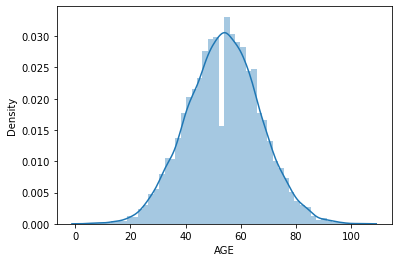

In [9]:
dg = sns.distplot(df['AGE'])
plt.show()

In [20]:
df[df.CLAIM_IND==0]['AGE'].value_counts().head(10)

54.0    260
55.0    246
57.0    241
50.0    238
53.0    233
51.0    233
59.0    233
47.0    227
56.0    227
49.0    222
Name: AGE, dtype: int64

In [19]:
df[df.CLAIM_IND==1]['AGE'].value_counts().head(10)

54.0    87
53.0    81
51.0    79
52.0    78
47.0    76
45.0    75
59.0    75
55.0    75
49.0    73
48.0    73
Name: AGE, dtype: int64

In [12]:
df.groupby(['CLAIM_IND'])['GENDER'].value_counts()

CLAIM_IND  GENDER
0          Fem       4017
           Mal       3537
1          Fem       1528
           Mal       1218
Name: GENDER, dtype: int64

In [26]:
df['AGE'].unique()

array([ 67.,  26.,  71.,  68.,  32.,  60.,  49.,  58.,  23.,  62.,  50.,
        55.,  34.,  63.,  39.,  51.,  27.,  52.,  42.,  45.,  61.,  69.,
        47.,  43.,  85.,  66.,  57.,  41.,  40.,  70.,  64.,  46.,  48.,
        54.,  29.,  44.,  33.,  72.,  65.,  77.,  59.,  79.,  83.,  35.,
        73.,  56.,  37.,  53.,  38.,  78.,  31.,  30.,  76.,  74.,  36.,
        97.,  80.,  25.,  28.,  nan,  75.,  19.,  84.,  24.,  14.,  81.,
        82.,  13.,  90.,  20.,  95.,  86.,  21.,  22.,  87.,  93.,  11.,
        92.,  16.,   9.,  88.,  96.,  18.,   6.,  91.,  17.,  94.,  89.,
        15.,  12.,  98.,  10.,   8.,   7.,   5., 103.])

In [62]:
ages = df.groupby(['AGE']).sum()['CLM_FREQ']

In [63]:
ages.values

array([ 33,  23,  20,  45,  52,  46,  78,  89, 131,  91, 118, 134, 174,
       202, 196, 160, 193, 250, 297, 323, 328, 357, 346, 383, 350, 437,
       448, 536, 462, 553, 568, 556, 481, 552, 634, 556, 553, 550, 535,
       593, 527, 494, 487, 383, 439, 391, 340, 286, 321, 325, 263, 199,
       221, 141, 185, 136, 151, 128,  87,  87,  67])

In [64]:
ages.index

Float64Index([20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0,
              31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0,
              42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0,
              53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0,
              64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0,
              75.0, 76.0, 77.0, 78.0, 79.0, 80.0],
             dtype='float64', name='AGE')

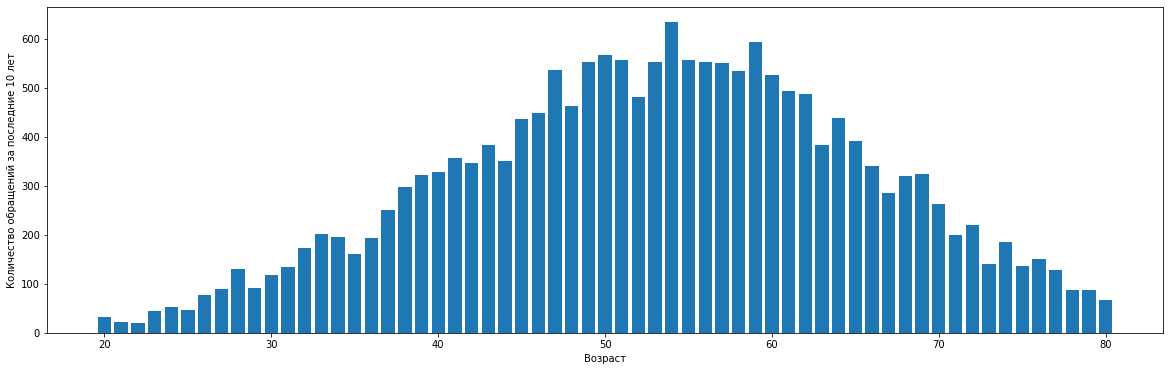

In [72]:
fig, ax = plt.subplots()

ax.bar(x=ages.index, height=ages.values)
fig.set_figwidth(20)    #  ширина Figure
fig.set_figheight(6) 
plt.xlabel('Возраст')
plt.ylabel('Количество обращений за последние 10 лет')
plt.show()

In [73]:
age_1 = df[df.CLAIM_IND==1]['AGE'].value_counts()

In [74]:
age_0 = df[df.CLAIM_IND==0]['AGE'].value_counts()

In [84]:
x2 = age_0.index+0.4

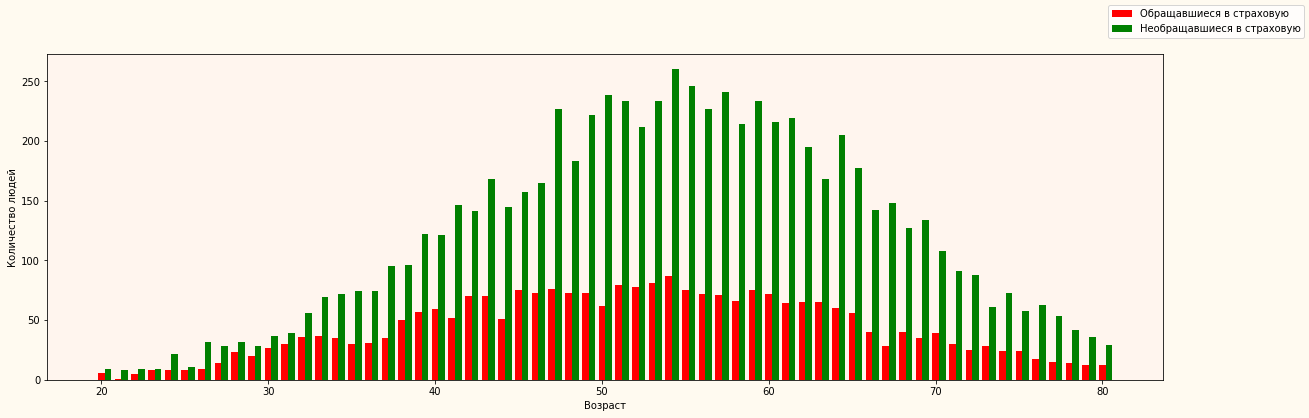

In [87]:
fig, ax = plt.subplots()

ax.bar(age_1.index, age_1.values, width = 0.4, color='Red',label='Обращавшиеся в страховую')
ax.bar(x2, age_0.values, width = 0.4, color='Green',label='Необращавшиеся в страховую')

ax.set_facecolor('seashell')
fig.set_figwidth(20)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
fig.set_facecolor('floralwhite')
fig.legend()
plt.xlabel('Возраст')
plt.ylabel('Количество людей')

plt.show()

In [91]:
df[(df.AGE>=50) & (df.AGE<=54) & (df.CLAIM_IND==1)].EDU_LEVEL.value_counts()

z_High School    129
Bachelors         99
<High School      81
Masters           61
PhD               17
Name: EDU_LEVEL, dtype: int64

In [101]:
age_freq = df.groupby('AGE').mean().CLM_FREQ
age_freq

AGE
20.0    2.200000
21.0    2.555556
22.0    1.428571
23.0    2.647059
24.0    1.733333
          ...   
76.0    1.887500
77.0    1.882353
78.0    1.553571
79.0    1.812500
80.0    1.634146
Name: CLM_FREQ, Length: 61, dtype: float64

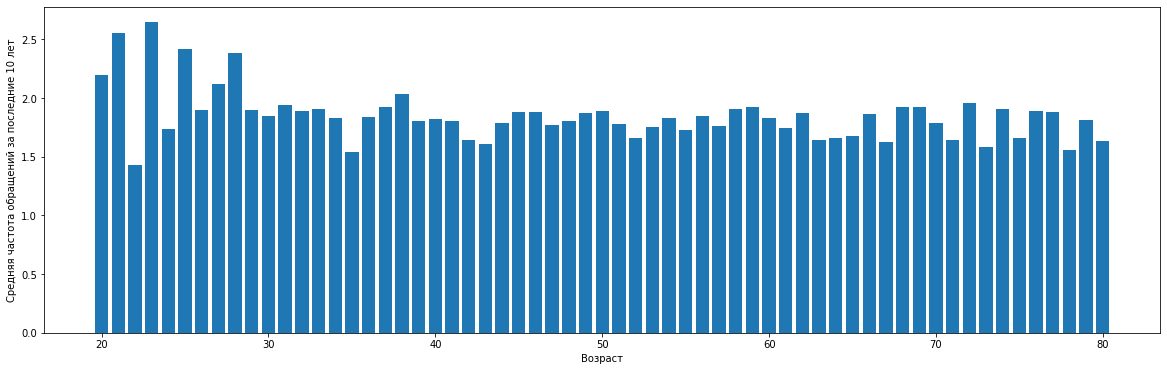

In [103]:
fig, ax = plt.subplots()

ax.bar(x=age_freq.index, height=age_freq.values)
fig.set_figwidth(20)    #  ширина Figure
fig.set_figheight(6) 
plt.xlabel('Возраст')
plt.ylabel('Средняя частота обращений за последние 10 лет')
plt.show()

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 8942 entries, 6921625014.0 to 1680683365.0
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CHILD_DRIV    8942 non-null   int64  
 1   AGE           8942 non-null   float64
 2   CHILDREN      8942 non-null   int64  
 3   YOJ           8471 non-null   float64
 4   INCOME        8942 non-null   object 
 5   HOUSE_VAL     8942 non-null   object 
 6   STATUS        8940 non-null   object 
 7   GENDER        8942 non-null   object 
 8   EDU_LEVEL     8942 non-null   object 
 9   JOB           8371 non-null   object 
 10  DISTANCE      8942 non-null   int64  
 11  CAR_USE       8942 non-null   object 
 12  VEHICLE_VAL   8942 non-null   object 
 13  VEHICLE_TYPE  8942 non-null   object 
 14  CLM_FREQ      8942 non-null   int64  
 15  REVOKED       8942 non-null   object 
 16  MVR_PTS       8942 non-null   int64  
 17  CLAIM_AMOUNT  8942 non-null   object 
 18  VEHICLE

In [162]:
df.DISTANCE.max()

187

In [177]:
dist1= df[df.CLAIM_IND==1].DISTANCE.value_counts()
dist0= df[df.CLAIM_IND==0].DISTANCE.value_counts()

In [178]:
x2 = dist0.index+0.4

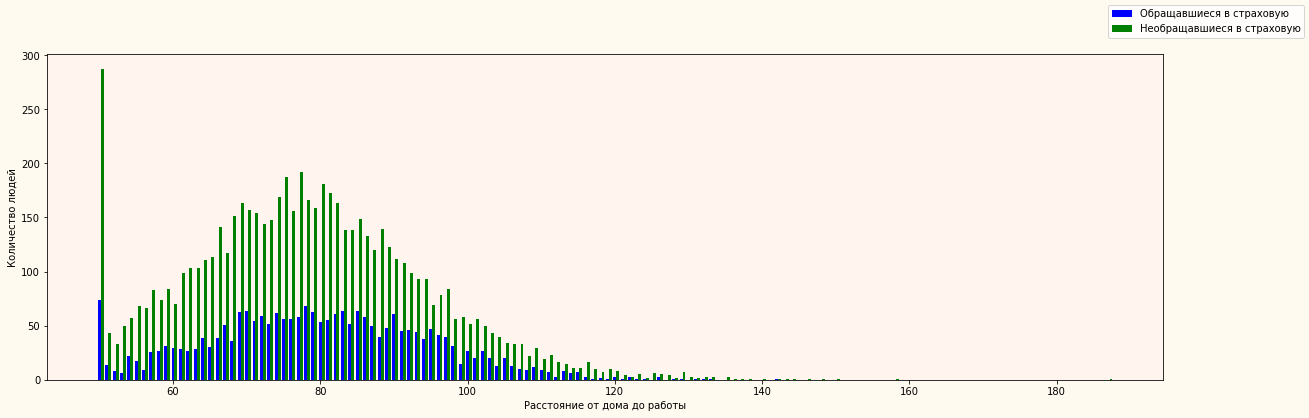

In [179]:
fig, ax = plt.subplots()

ax.bar(dist1.index, dist1.values, width = 0.4, color='Blue',label='Обращавшиеся в страховую')
ax.bar(x2, dist0.values, width = 0.4, color='Green',label='Необращавшиеся в страховую')

ax.set_facecolor('seashell')
fig.set_figwidth(20)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
fig.set_facecolor('floralwhite')
fig.legend()
plt.xlabel('Расстояние от дома до работы')
plt.ylabel('Количество людей')

plt.show()

In [182]:
d = df[(df.DISTANCE >= 70) & (df.DISTANCE <= 90) & (df.CLAIM_IND==1)].VEHICLE_AGE.value_counts()
d

3.0     356
10.0     98
9.0      91
11.0     82
12.0     72
8.0      57
13.0     55
14.0     47
15.0     41
16.0     36
7.0      34
17.0     30
18.0     27
19.0     22
6.0      19
20.0     18
21.0     11
5.0      11
22.0      8
23.0      3
4.0       2
27.0      2
25.0      1
Name: VEHICLE_AGE, dtype: int64

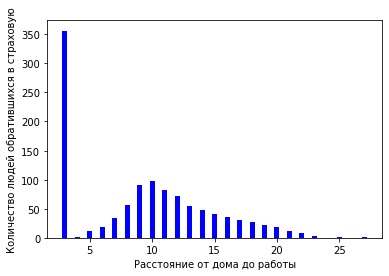

In [184]:
fig, ax = plt.subplots()

ax.bar(d.index, d.values, width = 0.4, color='Blue',label='Обращавшиеся в страховую')
plt.xlabel('Расстояние от дома до работы')
plt.ylabel('Количество людей обратившихся в страховую')
plt.show()

In [198]:
states = df[df.CLAIM_IND==1].groupby('AREA').count()['CLAIM_IND']

In [199]:
states

AREA
Highly Urban/ Urban      2270
z_Highly Rural/ Rural     115
Name: CLAIM_IND, dtype: int64

In [201]:
df[df.CLAIM_IND==1].REVOKED.value_counts()

No     1881
Yes     504
Name: REVOKED, dtype: int64

In [202]:
df[df.CLAIM_IND==0].REVOKED.value_counts()

No     5953
Yes     604
Name: REVOKED, dtype: int64

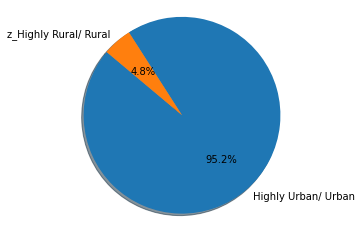

In [200]:
labels = states.index
sizes = states.values
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes,labels=labels,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()